In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")
cat = pd.read_csv("./data/item_categories.csv")
test = pd.read_csv("./data/test.csv")

# EDA

## 데이터 타입 정보

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


date 가 문자열이다...  

In [20]:
# date 를 datetime 형으로 변환 
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y") 
train["date"]

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [21]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [22]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [24]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


## train 데이터 프레임의 boxplot

### item_price

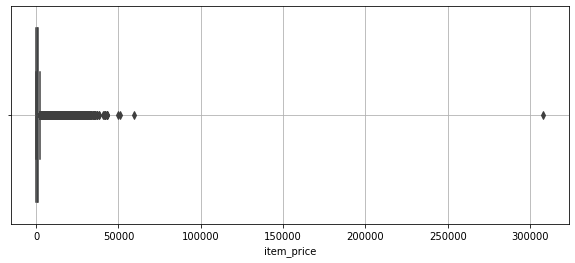

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)
plt.grid()

In [26]:
len(train[train["item_price"] >= 50000])

3

item_price값이 50000 이상인 행은 3개 이므로 제거 ..

In [27]:
train.drop(train[train["item_price"] >= 50000].index, axis = 0 , inplace=True)

## item_cnt_day

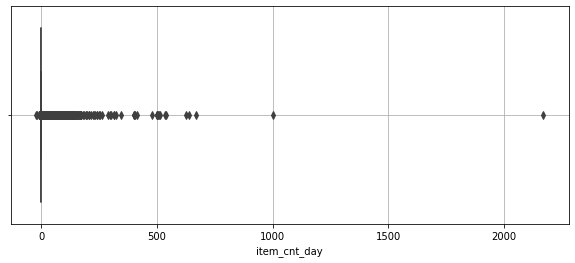

In [28]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)
plt.grid()

In [65]:
len(train[train["item_cnt_day"] >= 1000])

2

item_cnt_day값이 1000 이상인 행은 2개 이므로 제거 ..

In [66]:
train.drop(train[train["item_cnt_day"] >= 1000].index, axis = 0 , inplace=True)

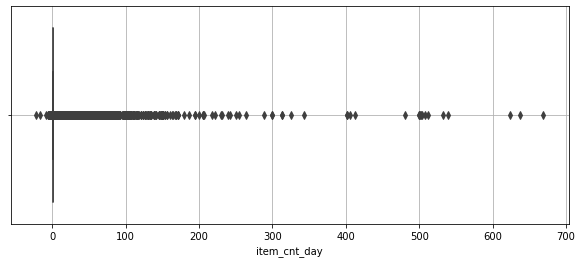

In [70]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)
plt.grid()

# shops

In [31]:
# 특수문자가 많이 들어가 있다. 
shops.head(20)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [32]:
# 특수문자 제거  및 중복된 가게의 코드 확인 
import re


def clean_text(inputString):
    text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
    return text_rmv
shops_names = shops["shop_name"].apply(clean_text)
shops_id = shops["shop_id"]
# 중복되는 이름 확인 

for i in list(zip(shops_names ,shops_id)):
    for j in list(zip(shops_names ,shops_id)):
        if (re.match('.*'+i[0]+'*.',j[0])) and (i[1]!= j[1]):
            print('code : ', i[1], ' and  ', j[1])
            


code :  10  and   11
code :  11  and   10
code :  39  and   40
code :  57  and   0
code :  58  and   1


In [33]:
#  중복된 코드 바꾸기 
train["shop_id"] = train["shop_id"].replace({0: 57, 1: 58, 11: 10, 40: 39})

#  item

# item_category

# Feature engineering

## 하루 총 매출 (income_per_days) 추가

In [34]:
# y = train['shop_id']
# x = train['item_price']
# plt.figure(figsize=(10,10))
# sns.barplot(x= x , y=y)
# plt.show()

pivot_for_check_dicount = train.pivot_table(index = ['item_id', 'date_seq'] , values = 'item_price')

for i  in range(len(pivot_for_check_dicount) -1):
    if  pivot_for_check_dicount.loc[i,:]['item_price'].nunique() >1:
        print( i+1 ,'번째 다른 값 있음')


KeyError: 'date_seq'

In [ ]:
pivot_for_check_dicount
# 가게별 판매가격이 다른 것이 있음 
# train['income_per_days'] = train['item_cnt_day'] * train['item_price']
# train['income_per_days'] = train['income_per_days']


## 날짜별 정렬을 위한 date_seq 추가

In [36]:
from sklearn.preprocessing import LabelEncoder
train.sort_values('date',inplace=True)
le = LabelEncoder()
train['date_seq'] = le.fit_transform(train['date'])



# 변수별 상관관계

In [37]:
# train_pivot_date_block_num = train.pivot_table(index = 'date_block_num' , values =  ,agg)
# plt.figure(figsize=(10,10))
# sns.pairplot(train_sample)

In [38]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [60]:
mg_1 = set(items['item_id'].unique()) - set(test['item_id'].unique())

In [61]:
mg_1

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 34,
 35,
 36,
 37,
 39,
 40,
 41,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 52,
 54,
 55,
 56,
 58,
 60,
 61,
 63,
 65,
 66,
 68,
 71,
 73,
 74,
 75,
 77,
 78,
 79,
 81,
 82,
 84,
 85,
 86,
 87,
 89,
 90,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 203,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 

In [43]:
items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")
cat = pd.read_csv("./data/item_categories.csv")
test = pd.read_csv("./data/test.csv")

In [71]:
test_1 = test.drop(['ID','shop_id'], axis=1)

,item_id
0,5037
1,5320
2,5233
3,5232
4,5268
...,...
214195,18454
214196,16188
214197,15757
214198,19648
